<a href="https://colab.research.google.com/github/ErikRidhoFirm/Pembelajaran-Mesin_Ganjil_2025/blob/main/Pembelajaran_Mesin_Erik_Ridho_Firmansyah_2341720031_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS Studi Kasus - Analisis Warna Daun (RGB)**

# **1. Processing Data**

import data menggunakan dataset mentah Excel bernama 'Analisis_RGB_Warna_Daun.xlsx'

lalu ubah dan pastikan Dataset mentah menjadi kolom R, G, B sebagai fitur utama.

Jumlah data: 1389
Kolom: ['R', 'G', 'B']

Cek missing value sebelum imputasi:
R    0
G    0
B    0
dtype: int64

Tidak ditemukan missing value.

Rasio variansi PCA: [0.50198537 0.2925741 ]
Total variansi yang dijelaskan: 79.46%

Contoh data hasil preprocessing:
     R      G       B    ExG  Greenness
0  151  149.0  106.40  40.60  -0.004921
1  151  149.0  109.78  37.22  -0.004881
2  151  149.0  106.40  40.60  -0.004921
3  151  149.0  130.06  16.94  -0.004651
4  151  151.4  106.40  45.40   0.000978
5  151  151.4  133.44  18.36   0.000918
6  151  149.0  106.40  40.60  -0.004921
7  151  149.0  133.44  13.56  -0.004614
8  151  149.0  106.40  40.60  -0.004921
9  151  149.0  133.44  13.56  -0.004614


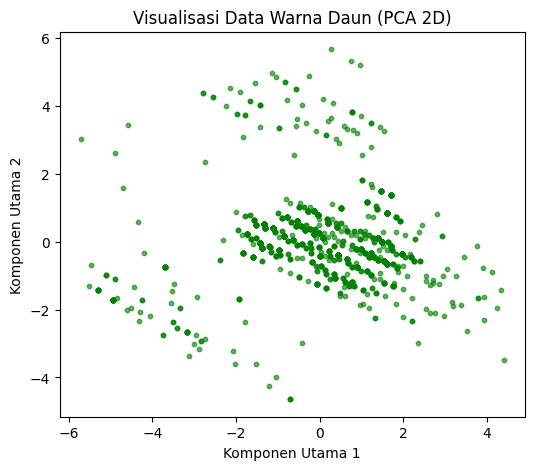

In [ ]:
# ===============================================================
# NOMOR 1 - PREPROCESSING DATA (UTS Pembelajaran Mesin)
# Dataset: Data RGB Warna Daun.xlsx
# ===============================================================

# 1. Import Library
import pandas as pd                # untuk mengelola data dalam bentuk tabel (DataFrame)
import numpy as np                 # untuk operasi numerik dan array
from sklearn.impute import SimpleImputer   # untuk mengisi nilai yang hilang (imputasi)
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # untuk standarisasi dan normalisasi
from sklearn.decomposition import PCA       # untuk reduksi dimensi (Principal Component Analysis)
import matplotlib.pyplot as plt             # untuk visualisasi data

# 2. Import Data
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Pembelajaran_Mesin/Data RGB Warna Daun.xlsx", header=3)
# Membaca file Excel menjadi DataFrame
# header=3 artinya baris ke-4 digunakan sebagai nama kolom (karena Python mulai hitung dari 0)

# 3. Pilih kolom R, G, B
df = df[['R', 'G', 'B']]                    # memilih hanya kolom R, G, dan B
print("Jumlah data:", len(df))              # mencetak jumlah baris data
print("Kolom:", df.columns.tolist())        # mencetak daftar nama kolom

# 4. Penanganan missing values (jika ada)
print("\nCek missing value sebelum imputasi:")
print(df.isnull().sum())                    # menampilkan jumlah nilai kosong (NaN) di tiap kolom

# Jika ada nilai kosong, lakukan imputasi (pengisian nilai hilang)
if df.isnull().any().any():                 # mengecek apakah ada nilai kosong di DataFrame
    imputer = SimpleImputer(strategy='mean')  # membuat objek imputasi dengan metode rata-rata (mean)
    df[['R', 'G', 'B']] = imputer.fit_transform(df[['R', 'G', 'B']])  # mengganti nilai kosong dengan rata-rata kolom
    print("\nMissing value telah diimputasi dengan mean.")
else:
    print("\nTidak ditemukan missing value.")  # jika tidak ada nilai kosong

# 5. Membuat fitur baru dari kombinasi R, G, B
df['ExG'] = 2 * df['G'] - df['R'] - df['B']    # membuat fitur Excess Green (ExG)
df['Greenness'] = (df['G'] - df['R']) / (df['R'] + df['G'] + df['B'] + 1e-9)
# membuat fitur Greenness (rasio kehijauan)
# ditambah 1e-9 untuk mencegah pembagian dengan nol

# 6. Normalisasi / Standarisasi
scaler_std = StandardScaler()                 # membuat objek standarisasi (mean=0, std=1)
X_std = scaler_std.fit_transform(df[['R', 'G', 'B', 'ExG', 'Greenness']])  # transformasi data standar

scaler_mm = MinMaxScaler()                    # membuat objek normalisasi (rentang 0–1)
X_mm = scaler_mm.fit_transform(df[['R', 'G', 'B', 'ExG', 'Greenness']])    # transformasi data ke skala 0–1

# 7. PCA untuk Visualisasi 2D (Opsional)
pca = PCA(n_components=2)                     # membuat objek PCA dengan 2 komponen utama
X_pca = pca.fit_transform(X_std)              # menerapkan PCA pada data hasil standarisasi

print("\nRasio variansi PCA:", pca.explained_variance_ratio_)              # menampilkan rasio variansi tiap komponen
print("Total variansi yang dijelaskan: {:.2f}%".format(sum(pca.explained_variance_ratio_) * 100))
# menampilkan total variansi yang dijelaskan oleh dua komponen utama

# 8. Tampilkan contoh hasil
df_preview = df.head(10)                      # menampilkan 10 baris pertama data hasil preprocessing
print("\nContoh data hasil preprocessing:")
print(df_preview)                             # menampilkan hasilnya

# 9. Visualisasi PCA (opsional)
plt.figure(figsize=(6,5))                     # ukuran plot 6x5 inci
plt.scatter(X_pca[:,0], X_pca[:,1], s=10, c='green', alpha=0.6)  # membuat scatter plot PCA
plt.title("Visualisasi Data Warna Daun (PCA 2D)")                 # judul grafik
plt.xlabel("Komponen Utama 1")                # label sumbu X
plt.ylabel("Komponen Utama 2")                # label sumbu Y
plt.show()                                    # menampilkan plot di layar


Penjelasan:

Metode yang digunakan untuk menangani imputasi data dengan 'mean' dikarenakan semua kolom berupa numerik sehingga hasilnya tidak ditemukan missing values dan tidak ada data yang diubah.

disini juga memvisualisasikan gambarnya dengan tujuan mengubah data berdimensi banyak dan menjadikan hanya 2 atau 3 dimensi tanpa kehilangan terlalu banyak informasi penting, dan juga merangkum data ke 2 dimensi utama yang masih mempeerhatikan pola aslinya sebanyak mungkin. dengan cara mencari kombinasi linier terbaik dari fitur-fitur asli yang menjelaskan variasi terbesar pada data.

# **2. Clustering**

Terapkan K-Means dan DBSCAN (Untuk No. Absen Ganjil 1, 3, 5, dst)

Terapkan K-Means dan HDBSCAN (Untuk No. Absen Genap 2, 4, 6,
dst)

lalu bandingkan hasil clustering menggunakan:
* Silhoutte Score
* Davies-Bouldin Index

Disini saya memakai hasil dari nomor 1

dengan fitur utama ['R', 'G', 'B', 'ExG', 'Greenness'] dengan data yang sudah distandarisasi (mean=0, std=1) agar clustering lebih stabil.

Menerapkan Clustering dengan K-Means Genap (absen 10)

Pada bagian ini mencoba beberapa jumlah cluster (k=2 sampai k=6) lalu memilih k terbaik berdasarkan Silhoutte Score tertinggi, kemudian dihitung juga Davies-Bouldin Index (Semakin kecil semakin baik).

=== K-MEANS CLUSTERING ===
k=2: Silhouette=0.3528, Davies-Bouldin=1.1708
k=3: Silhouette=0.3976, Davies-Bouldin=0.9793
k=4: Silhouette=0.4331, Davies-Bouldin=0.8277
k=5: Silhouette=0.4761, Davies-Bouldin=0.8594
k=6: Silhouette=0.4590, Davies-Bouldin=0.7433
k=7: Silhouette=0.4161, Davies-Bouldin=0.8023

K terbaik berdasarkan Silhouette Score = 5

=== HDBSCAN CLUSTERING ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Jumlah cluster HDBSCAN: 21 (noise = 266)
Silhouette Score: 0.4547
Davies-Bouldin Index: 0.9887

=== PERBANDINGAN K-MEANS vs HDBSCAN ===
K-Means:    k=5,  Silhouette=0.4761,  Davies-Bouldin=0.8594
HDBSCAN:    cluster=21,  Silhouette=0.4547,  Davies-Bouldin=0.9887


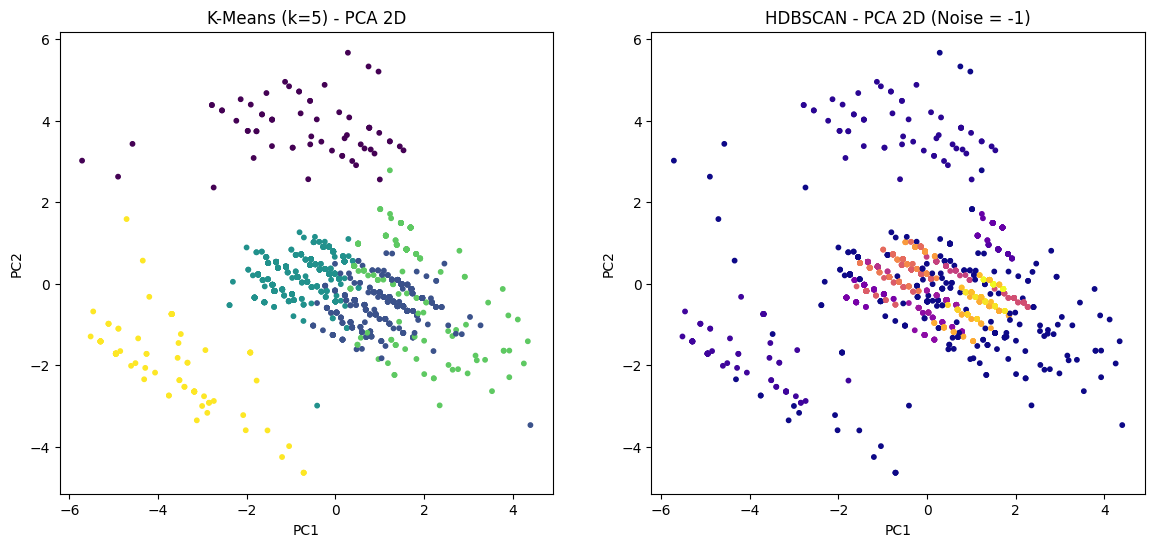

In [ ]:
# ===============================================================
# NOMOR 2 - CLUSTERING (UNTUK ABSEN GENAP)
# Metode: K-MEANS dan HDBSCAN
# ===============================================================

# Import library yang dibutuhkan
import pandas as pd                                   # untuk membaca dan mengelola data (DataFrame)
import numpy as np                                    # untuk operasi numerik seperti array, mean, std
from sklearn.preprocessing import StandardScaler      # untuk standarisasi data (mean=0, std=1)
from sklearn.cluster import KMeans                    # algoritma K-Means
from sklearn.metrics import silhouette_score, davies_bouldin_score  # metrik evaluasi kualitas cluster
import hdbscan                                        # algoritma clustering berbasis densitas (HDBSCAN)
from sklearn.decomposition import PCA                 # untuk reduksi dimensi (2D visualisasi)
import matplotlib.pyplot as plt                       # untuk menampilkan grafik dan visualisasi hasil clustering

# ---------------------------------------------------------------
# 1. Membaca dan menyiapkan data
# ---------------------------------------------------------------
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Pembelajaran_Mesin/Data RGB Warna Daun.xlsx", header=3)
# Membaca file Excel ke DataFrame
# Parameter header=3 artinya baris ke-4 digunakan sebagai nama kolom

df = df[['R', 'G', 'B']]                              # Memilih hanya kolom R, G, dan B dari dataset
df['ExG'] = 2 * df['G'] - df['R'] - df['B']           # Membuat fitur baru Excess Green (indikator kehijauan)
df['Greenness'] = (df['G'] - df['R']) / (df['R'] + df['G'] + df['B'] + 1e-9)
# Membuat fitur rasio kehijauan (Greenness)
# Ditambah 1e-9 untuk mencegah pembagian dengan nol

# ---------------------------------------------------------------
# 2. Standarisasi data
# ---------------------------------------------------------------
features = ['R','G','B','ExG','Greenness']             # Menentukan kolom fitur yang akan digunakan untuk clustering
X_scaled = StandardScaler().fit_transform(df[features])
# Menstandarkan data agar setiap fitur punya mean=0 dan std=1
# Hal ini penting agar tidak ada fitur yang mendominasi karena skala besar

# ---------------------------------------------------------------
# 3. CLUSTERING MENGGUNAKAN K-MEANS
# ---------------------------------------------------------------
print("=== K-MEANS CLUSTERING ===")

best_k = None                                          # Variabel untuk menyimpan nilai k terbaik
best_silhouette = -1                                   # Inisialisasi nilai Silhouette tertinggi

# Melakukan percobaan jumlah cluster dari 2 hingga 8
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Membuat model K-Means
    labels_km = kmeans.fit_predict(X_scaled)                   # Melatih model dan menghasilkan label cluster
    sil = silhouette_score(X_scaled, labels_km)                # Menghitung nilai Silhouette Score
    dbi = davies_bouldin_score(X_scaled, labels_km)            # Menghitung Davies–Bouldin Index
    print(f"k={k}: Silhouette={sil:.4f}, Davies-Bouldin={dbi:.4f}")
    # Menampilkan nilai Silhouette dan DBI untuk setiap jumlah cluster

    # Simpan nilai k terbaik berdasarkan Silhouette tertinggi
    if sil > best_silhouette:
        best_silhouette = sil
        best_k = k

# Menampilkan jumlah cluster terbaik berdasarkan hasil evaluasi
print(f"\nK terbaik berdasarkan Silhouette Score = {best_k}")

# Jalankan kembali K-Means menggunakan jumlah cluster terbaik
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_scaled)
sil_km = silhouette_score(X_scaled, labels_km)          # Nilai Silhouette akhir untuk K-Means terbaik
dbi_km = davies_bouldin_score(X_scaled, labels_km)      # Nilai Davies-Bouldin akhir

# ---------------------------------------------------------------
# 4. CLUSTERING MENGGUNAKAN HDBSCAN
# ---------------------------------------------------------------
print("\n=== HDBSCAN CLUSTERING ===")

# Membuat model HDBSCAN dengan parameter awal
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=10)
labels_hdb = clusterer.fit_predict(X_scaled)            # Melatih HDBSCAN dan menghasilkan label cluster

# Karena HDBSCAN bisa menghasilkan noise (-1), kita hitung metrik hanya untuk data bukan noise
mask = labels_hdb != -1                                # Filter data yang bukan noise
if len(np.unique(labels_hdb[mask])) > 1:               # Hanya hitung jika ada lebih dari 1 cluster valid
    sil_hdb = silhouette_score(X_scaled[mask], labels_hdb[mask])
    dbi_hdb = davies_bouldin_score(X_scaled[mask], labels_hdb[mask])
else:
    sil_hdb, dbi_hdb = np.nan, np.nan                  # Jika hanya 1 cluster, skor tidak bisa dihitung

# Menampilkan hasil HDBSCAN
print(f"Jumlah cluster HDBSCAN: {len(np.unique(labels_hdb)) - (1 if -1 in labels_hdb else 0)} (noise = {(labels_hdb==-1).sum()})")
print(f"Silhouette Score: {sil_hdb:.4f}")
print(f"Davies-Bouldin Index: {dbi_hdb:.4f}")

# ---------------------------------------------------------------
# 5. PERBANDINGAN HASIL ANTARA K-MEANS DAN HDBSCAN
# ---------------------------------------------------------------
print("\n=== PERBANDINGAN K-MEANS vs HDBSCAN ===")
print(f"K-Means:    k={best_k},  Silhouette={sil_km:.4f},  Davies-Bouldin={dbi_km:.4f}")
print(f"HDBSCAN:    cluster={(len(np.unique(labels_hdb))-1)},  Silhouette={sil_hdb:.4f},  Davies-Bouldin={dbi_hdb:.4f}")

# ---------------------------------------------------------------
# 6. VISUALISASI HASIL CLUSTERING MENGGUNAKAN PCA 2D
# ---------------------------------------------------------------
pca = PCA(n_components=2)                              # Membuat objek PCA dengan 2 komponen utama
X_pca = pca.fit_transform(X_scaled)                    # Mengubah data hasil standarisasi ke 2 dimensi (PCA)

# Membuat dua subplot untuk visualisasi K-Means dan HDBSCAN berdampingan
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# --- Visualisasi hasil K-Means ---
ax[0].scatter(X_pca[:,0], X_pca[:,1], c=labels_km, cmap='viridis', s=10)
ax[0].set_title(f"K-Means (k={best_k}) - PCA 2D")      # Judul plot kiri
ax[0].set_xlabel("PC1")                               # Label sumbu X
ax[0].set_ylabel("PC2")                               # Label sumbu Y

# --- Visualisasi hasil HDBSCAN ---
ax[1].scatter(X_pca[:,0], X_pca[:,1], c=labels_hdb, cmap='plasma', s=10)
ax[1].set_title("HDBSCAN - PCA 2D (Noise = -1)")    # Judul plot kanan
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC2")

plt.show()    # Menampilkan dua grafik hasil clustering

Pada perbandingan Silhoutte Score dan Davies-Bouldin Index dapat disimpulkan bahwa

* untuk menentukan jumlah kluster K-Means & HDBSCAN sama sama melakukan perhitungan secara otomatis.

* untuk mendeteksi noise atau outlier K-Means tidak bisa mendeteksi HDBSCAN bisa dengan label = -1

* untuk Silhoutte Score (semakin tinggi semakin baik) pada K-Means rendah yaitu 0,47 dan HDBSCAN mendapatkan nilai
0,53 yang lebih tinggi.

* untuk Davies-Bouldin Index (semakin rendah semakin baik) pada K-Means 0,85 yang artinya tinggi sedangkan HDBSCAN lebih rendah 0,82

# **3. Approximate Nearest Neighbor (ANN)**

Menggunakan Annoy untuk mencari tetangga terdekat dari beberapa query point hasil clustering dan menampilkan output berupa:
* Index query point
* Daftar tetangga terdekat yang ditemukan
* Nilai jarak kemiripan

Lakukan install untuk library annoy

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551812 sha256=a20d093d111088eb08782f30519dac2f71d92411641cc532766ea68fb9e588bb
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


Disini hasil clustering yang digunakan pada percobaan nomer 2 yang dimana data tersebut suda dilakukannya normalisasi (0-1) menggunakan MinMaxScalar dengan kolom utama R, G, B, ExG dan Greeness.

In [ ]:
# ===============================================================
# NOMOR 3 - APPROXIMATE NEAREST NEIGHBOR (ANN) + CLUSTERING HDBSCAN
# ===============================================================

# Import library yang diperlukan
from annoy import AnnoyIndex          # untuk melakukan pencarian tetangga terdekat secara efisien (ANN)
import random                         # untuk pemilihan data acak (query point)
import pandas as pd                   # untuk memanipulasi data dalam bentuk DataFrame
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # untuk normalisasi dan standarisasi fitur
import hdbscan                        # algoritma clustering berbasis kepadatan
from sklearn.decomposition import PCA  # untuk reduksi dimensi dan visualisasi 2D
import matplotlib.pyplot as plt        # untuk membuat visualisasi grafik

# ---------------------------------------------------------------
# 1️⃣ Membaca dan menyiapkan data
# ---------------------------------------------------------------

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Pembelajaran_Mesin/Data RGB Warna Daun.xlsx", header=3)
# Membaca file Excel ke dalam DataFrame
# header=3 artinya baris ke-4 dijadikan nama kolom (karena baris 0–2 berisi metadata)

df = df[['R', 'G', 'B']]
# Memilih hanya kolom utama R, G, dan B (nilai intensitas warna daun)

df['ExG'] = 2*df['G'] - df['R'] - df['B']
# Membuat fitur baru bernama "Excess Green" (ExG) untuk menunjukkan tingkat kehijauan daun

df['Greenness'] = (df['G'] - df['R']) / (df['R'] + df['G'] + df['B'] + 1e-9)
# Membuat fitur rasio kehijauan (Greenness)
# Ditambah 1e-9 agar tidak terjadi pembagian dengan nol

features = ['R', 'G', 'B', 'ExG', 'Greenness']
# Menentukan kolom fitur yang akan digunakan dalam proses clustering dan ANN

# ---------------------------------------------------------------
# 2️⃣ Standarisasi dan Normalisasi Data
# ---------------------------------------------------------------

scaler_std = StandardScaler()
# Membuat objek standarisasi untuk menyamakan skala data (mean=0, std=1)

X_scaled = scaler_std.fit_transform(df[features])
# Melakukan standarisasi terhadap seluruh fitur agar memiliki skala sebanding

scaler_mm = MinMaxScaler()
# Membuat objek normalisasi agar data berada dalam rentang [0, 1]

X_minmax = scaler_mm.fit_transform(df[features])
# Melakukan normalisasi data yang akan digunakan oleh Annoy (karena ANN sensitif terhadap skala fitur)

# ---------------------------------------------------------------
# 3️⃣ Proses Clustering Menggunakan HDBSCAN
# ---------------------------------------------------------------

clusterer = hdbscan.HDBSCAN(min_cluster_size=20, metric='euclidean')
# Membuat objek HDBSCAN dengan:
# - min_cluster_size=20 → minimal jumlah anggota dalam 1 cluster
# - metric='euclidean' → jarak yang digunakan adalah Euclidean distance

labels_hdb = clusterer.fit_predict(X_scaled)
# Menjalankan algoritma HDBSCAN dan menyimpan label cluster hasilnya
# Setiap data akan diberi label cluster (misalnya 0, 1, 2, ... atau -1 jika dianggap noise)

df['Cluster_HDBSCAN'] = labels_hdb
# Menambahkan kolom baru pada DataFrame untuk menyimpan hasil cluster setiap data

# ---------------------------------------------------------------
# 5️⃣ Membangun Index Annoy untuk Pencarian Tetangga Terdekat
# ---------------------------------------------------------------

f_dim = X_minmax.shape[1]
# Menyimpan jumlah dimensi fitur (harus sama dengan jumlah kolom dalam X_minmax)

ann_index = AnnoyIndex(f_dim, 'euclidean')
# Membuat objek AnnoyIndex dengan:
# - f_dim = jumlah fitur
# - metrik jarak = Euclidean (jarak garis lurus antar titik)

for i, v in enumerate(X_minmax):
    ann_index.add_item(i, v.tolist())
# Menambahkan setiap baris data (fitur daun) ke dalam index Annoy
# i = indeks data, v = vektor fitur normalisasi

ann_index.build(n_trees=50)
# Membangun struktur pohon Annoy dengan 50 pohon (semakin banyak pohon → akurasi lebih tinggi tapi lebih lambat)
# Proses ini adalah bagian "training" dari Annoy

# ---------------------------------------------------------------
# 6️⃣ Menentukan Titik Query Secara Acak
# ---------------------------------------------------------------

random.seed(42)
# Menetapkan nilai acak tetap agar hasil pemilihan query selalu sama setiap kali dijalankan

n_query = 5
# Menentukan jumlah titik yang akan dijadikan query (misalnya 5 titik acak)

query_indices = random.sample(range(len(df)), n_query)
# Mengambil 5 indeks acak dari seluruh data untuk digunakan sebagai query point

# ---------------------------------------------------------------
# 7️⃣ Pencarian Tetangga Terdekat (Nearest Neighbors)
# ---------------------------------------------------------------

print("Hasil Approximate Nearest Neighbor (Annoy):\n")

for qi in query_indices:
    # Melakukan pencarian untuk setiap titik query

    nns, dists = ann_index.get_nns_by_item(qi, 6, include_distances=True)
    # Mencari 6 tetangga terdekat (karena 1 di antaranya adalah dirinya sendiri)
    # Mengembalikan dua daftar: nns (index tetangga), dists (jarak antar titik)

    pairs = [(idx, dist) for idx, dist in zip(nns, dists) if idx != qi][:5]
    # Menghapus dirinya sendiri dari daftar hasil (karena pasti jarak=0)
    # Menyimpan hanya 5 tetangga lain dengan jarak terdekat

    # Menampilkan hasil tetangga terdekat
    print(f"Query index {qi}: (R,G,B) = ({df.loc[qi,'R']:.1f}, {df.loc[qi,'G']:.1f}, {df.loc[qi,'B']:.1f}), Cluster={df.loc[qi,'Cluster_HDBSCAN']}")
    # Menampilkan informasi query: index, nilai RGB, dan cluster-nya

    for nb_idx, dist in pairs:
        print(f"  → Neighbor {nb_idx}  jarak={dist:.5f}  (R,G,B)=({df.loc[nb_idx,'R']:.1f},{df.loc[nb_idx,'G']:.1f},{df.loc[nb_idx,'B']:.1f}), Cluster={df.loc[nb_idx,'Cluster_HDBSCAN']}")
        # Menampilkan daftar tetangga terdekat beserta jarak kemiripan dan label cluster-nya

    print("-"*80)
    # Garis pemisah antar hasil query agar mudah dibaca di terminal


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Hasil Approximate Nearest Neighbor (Annoy):

Query index 1309: (R,G,B) = (149.0, 149.0, 106.4), Cluster=13
  → Neighbor 1295  jarak=0.00000  (R,G,B)=(149.0,149.0,106.4), Cluster=13
  → Neighbor 1296  jarak=0.00000  (R,G,B)=(149.0,149.0,106.4), Cluster=13
  → Neighbor 838  jarak=0.04904  (R,G,B)=(149.0,149.0,103.0), Cluster=13
  → Neighbor 841  jarak=0.04904  (R,G,B)=(149.0,149.0,103.0), Cluster=13
  → Neighbor 939  jarak=0.04904  (R,G,B)=(149.0,149.0,103.0), Cluster=13
--------------------------------------------------------------------------------
Query index 228: (R,G,B) = (144.0, 146.6, 119.9), Cluster=-1
  → Neighbor 201  jarak=0.00000  (R,G,B)=(144.0,146.6,119.9), Cluster=-1
  → Neighbor 82  jarak=0.04933  (R,G,B)=(144.0,146.6,123.3), Cluster=4
  → Neighbor 187  jarak=0.04933  (R,G,B)=(144.0,146.6,123.3), Cluster=4
  → Neighbor 243  jarak=0.04933  (R,G,B)=(144.0,146.6,123.3), Cluster=4
  → Neighbor 1259  jarak=0.04933  (R,G,B)=(144.0,146.6,123.3), Cluster=4
-----------------------

Penjelasan:

* Query point 1309 memiliki 5 tetangga dengan warna daun yang mirip, yang dimana jarak 1295 & 1296 punya jarak 0,00000 artinya identik dan benar sama warna daun nya. Pada neighbor 838, 841, 939 punya jarak 0.04904, berarti sangat mirip (warna hampir sama).

* Query point 228 memiliki neighbor 201 yang identik dengan jarak 0,00000 dan neighbor 82, 187, 243, 1259 → sangat mirip 0.049.

* Query point 51 memiliki jarak yang neighbor nya sama semua yaitu 0 artinya semua tetangga memiliki warna daun yang identik bisa jadi data dari hasil sampling area warna daun yang sama persis.

* Query point 562 juga sama dengan Query point 51 memiliki neighbor dengan jarak 0,00000 semua.

* Query point 501 memiliki jarak lebih dari 0,31 dari semua neighbor nya, berarti semua neighbor yang berada di Query point tersebut tidak mirip ini disebabkan oleh variasi warna daun seperti bagian daun tua, daun kering, atau terkena bayangan cahaya).